In [34]:
%pip install folium pandas matplotlib seaborn geopy xlrd 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [54]:
import pandas as pd

df = pd.read_csv('한국도로교통공단_시군구별 월별 교통사고 통계_20241231.csv', encoding='euc-kr')
df

,시도,시군구,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,1,77,0,25,70,2
1,서울,종로구,2,56,0,13,57,6
2,서울,종로구,3,74,0,28,66,7
3,서울,종로구,4,84,0,23,84,3
4,서울,종로구,5,61,1,9,67,11
...,...,...,...,...,...,...,...,...
2735,세종,세종시,8,108,0,19,131,18
2736,세종,세종시,9,103,0,19,114,30
2737,세종,세종시,10,104,0,17,113,29
2738,세종,세종시,11,136,2,18,147,13


In [55]:
df['도시명'] = df['시도']+" " + df['시군구']
df

,시도,시군구,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수,도시명
0,서울,종로구,1,77,0,25,70,2,서울 종로구
1,서울,종로구,2,56,0,13,57,6,서울 종로구
2,서울,종로구,3,74,0,28,66,7,서울 종로구
3,서울,종로구,4,84,0,23,84,3,서울 종로구
4,서울,종로구,5,61,1,9,67,11,서울 종로구
...,...,...,...,...,...,...,...,...,...
2735,세종,세종시,8,108,0,19,131,18,세종 세종시
2736,세종,세종시,9,103,0,19,114,30,세종 세종시
2737,세종,세종시,10,104,0,17,113,29,세종 세종시
2738,세종,세종시,11,136,2,18,147,13,세종 세종시


In [56]:
import pandas as pd

tf = pd.read_csv('20250920213710_방문자 수 추이.csv')

tf = tf[tf['방문자 구분'] == '전체방문자(a+b)']
tf['발생월'] = tf['기준년월'].apply(lambda x: (int(x) - 202400))
tf

,기준년월,광역지자체,방문자 구분,방문자 수,발생월
1,202401,전국,전체방문자(a+b),9.927256e+08,1
4,202402,전국,전체방문자(a+b),9.416580e+08,2
7,202403,전국,전체방문자(a+b),1.051182e+09,3
10,202404,전국,전체방문자(a+b),9.755744e+08,4
13,202405,전국,전체방문자(a+b),1.034630e+09,5
16,202406,전국,전체방문자(a+b),9.915202e+08,6
19,202407,전국,전체방문자(a+b),1.013201e+09,7
22,202408,전국,전체방문자(a+b),1.016482e+09,8
25,202409,전국,전체방문자(a+b),1.006327e+09,9
28,202410,전국,전체방문자(a+b),1.047261e+09,10


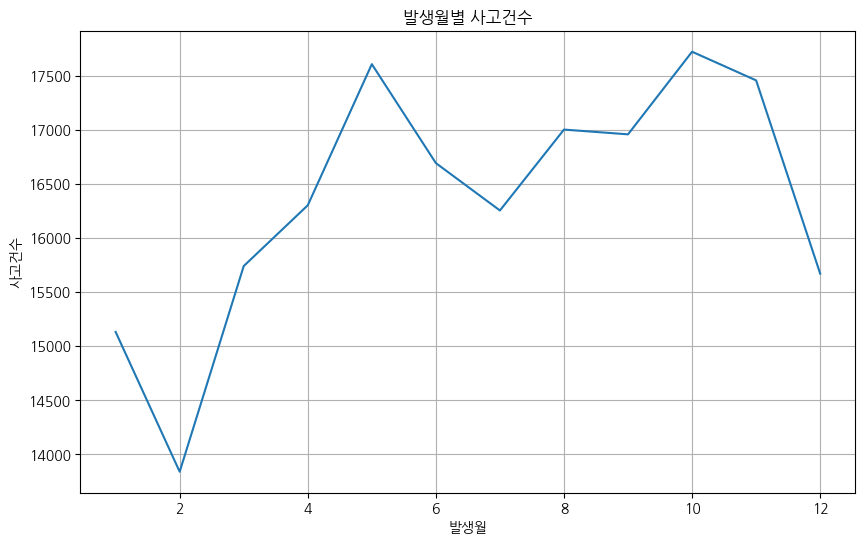

In [57]:
# 발생월별 사망자수
import koreanize_matplotlib
import matplotlib.pyplot as plt

total_by_month = df.groupby('발생월')['사고건수'].sum()  # 발생월별 사망자수 합계 계산
total_by_month.sort_index(inplace=True)  # 발생월 기준 정렬
total_by_month

# 그래프 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(total_by_month.index, total_by_month)
plt.xlabel('발생월')
plt.ylabel('사고건수')
plt.title('발생월별 사고건수')
plt.grid(True)
plt.show()

In [58]:
df1=df[['발생월','사고건수']]
df1=df1.groupby('발생월').sum().reset_index()
df1

,발생월,사고건수
0,1,15129
1,2,13836
2,3,15738
3,4,16300
4,5,17605
5,6,16690
6,7,16252
7,8,17000
8,9,16956
9,10,17720


In [59]:
tf=pd.read_csv('20250920213710_방문자 수 추이.csv')
tf=tf[tf['방문자 구분']=='전체방문자(a+b)']
tf['발생월']=tf['기준년월'].apply(lambda x: x-202400)
tf

,기준년월,광역지자체,방문자 구분,방문자 수,발생월
1,202401,전국,전체방문자(a+b),9.927256e+08,1
4,202402,전국,전체방문자(a+b),9.416580e+08,2
7,202403,전국,전체방문자(a+b),1.051182e+09,3
10,202404,전국,전체방문자(a+b),9.755744e+08,4
13,202405,전국,전체방문자(a+b),1.034630e+09,5
16,202406,전국,전체방문자(a+b),9.915202e+08,6
19,202407,전국,전체방문자(a+b),1.013201e+09,7
22,202408,전국,전체방문자(a+b),1.016482e+09,8
25,202409,전국,전체방문자(a+b),1.006327e+09,9
28,202410,전국,전체방문자(a+b),1.047261e+09,10


In [62]:
rf=pd.merge(df1,tf,on='발생월',how='inner')[['발생월','사고건수','방문자 수']]
rf.reset_index(drop=True, inplace=True)
rf


,발생월,사고건수,방문자 수
0,1,15129,9.927256e+08
1,2,13836,9.416580e+08
2,3,15738,1.051182e+09
3,4,16300,9.755744e+08
4,5,17605,1.034630e+09
5,6,16690,9.915202e+08
6,7,16252,1.013201e+09
7,8,17000,1.016482e+09
8,9,16956,1.006327e+09
9,10,17720,1.047261e+09


In [71]:
import pandas as pd
tf = pd.read_excel('온도데이터.xlsx')
tf['발생월'] = tf['년월'].str.split('-').str[1]
tf = tf[['발생월','평균기온(℃)', '평균최저기온(℃)', '평균최고기온(℃)']]
tf['발생월'] = tf['발생월'].astype(int)
tf.info()
tf


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   발생월        12 non-null     int64  
 1   평균기온(℃)    12 non-null     float64
 2   평균최저기온(℃)  12 non-null     float64
 3   평균최고기온(℃)  12 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 516.0 bytes


,발생월,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
0,1,0.9,-3.4,5.7
1,2,4.1,0.0,8.8
2,3,6.9,1.4,12.6
3,4,14.9,9.4,21.1
4,5,17.7,11.8,24.0
5,6,22.7,17.5,28.4
6,7,26.2,23.3,29.9
7,8,27.9,24.1,33.0
8,9,24.7,20.9,29.6
9,10,16.1,11.9,21.4


In [83]:
import numpy as np
# 두 데이터 프레임을 병합하는 방법
# 병합 조건은 발생월이 같아야 한다
# 병합 후 발생월이 중복되므로 중복 행을 제거한다
merged_df = pd.merge(tf, rf, on='발생월', how='inner')
merged_df = merged_df.drop_duplicates(subset=['발생월'])
merged_df['평균기온(℃)_abs_mean'] = np.abs(merged_df['평균기온(℃)'] - merged_df['평균기온(℃)'].mean())
merged_df

,발생월,평균기온(℃),평균최저기온(℃),평균최고기온(℃),사고건수,방문자 수,평균기온(℃)_abs_mean
0,1,0.9,-3.4,5.7,15129,9.927256e+08,13.566667
1,2,4.1,0.0,8.8,13836,9.416580e+08,10.366667
2,3,6.9,1.4,12.6,15738,1.051182e+09,7.566667
3,4,14.9,9.4,21.1,16300,9.755744e+08,0.433333
4,5,17.7,11.8,24.0,17605,1.034630e+09,3.233333
5,6,22.7,17.5,28.4,16690,9.915202e+08,8.233333
6,7,26.2,23.3,29.9,16252,1.013201e+09,11.733333
7,8,27.9,24.1,33.0,17000,1.016482e+09,13.433333
8,9,24.7,20.9,29.6,16956,1.006327e+09,10.233333
9,10,16.1,11.9,21.4,17720,1.047261e+09,1.633333


In [86]:

merged_df = merged_df[['평균기온(℃)', '사고건수', '방문자 수', '평균기온(℃)_abs_mean']]
merged_df


,평균기온(℃),사고건수,방문자 수,평균기온(℃)_abs_mean
발생월,,,,
1,0.9,15129,9.927256e+08,13.566667
2,4.1,13836,9.416580e+08,10.366667
3,6.9,15738,1.051182e+09,7.566667
4,14.9,16300,9.755744e+08,0.433333
5,17.7,17605,1.034630e+09,3.233333
6,22.7,16690,9.915202e+08,8.233333
7,26.2,16252,1.013201e+09,11.733333
8,27.9,17000,1.016482e+09,13.433333
9,24.7,16956,1.006327e+09,10.233333


In [88]:
merged_df.corr()

,평균기온(℃),사고건수,방문자 수,평균기온(℃)_abs_mean
평균기온(℃),1.000000,0.605064,0.171729,-0.056419
사고건수,0.605064,1.000000,0.615242,-0.498230
방문자 수,0.171729,0.615242,1.000000,-0.172214
평균기온(℃)_abs_mean,-0.056419,-0.498230,-0.172214,1.000000


<Axes: xlabel='평균기온(℃)', ylabel='Count'>

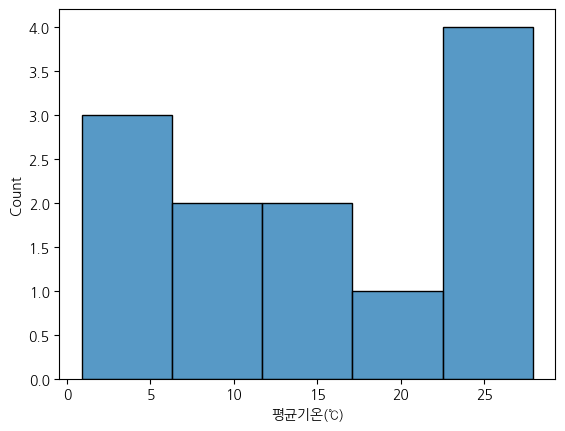

In [76]:
import seaborn as sns
# 평균기온(℃)을 가지고 히스토그램으로 그려줌
sns.histplot(merged_df['평균기온(℃)'])


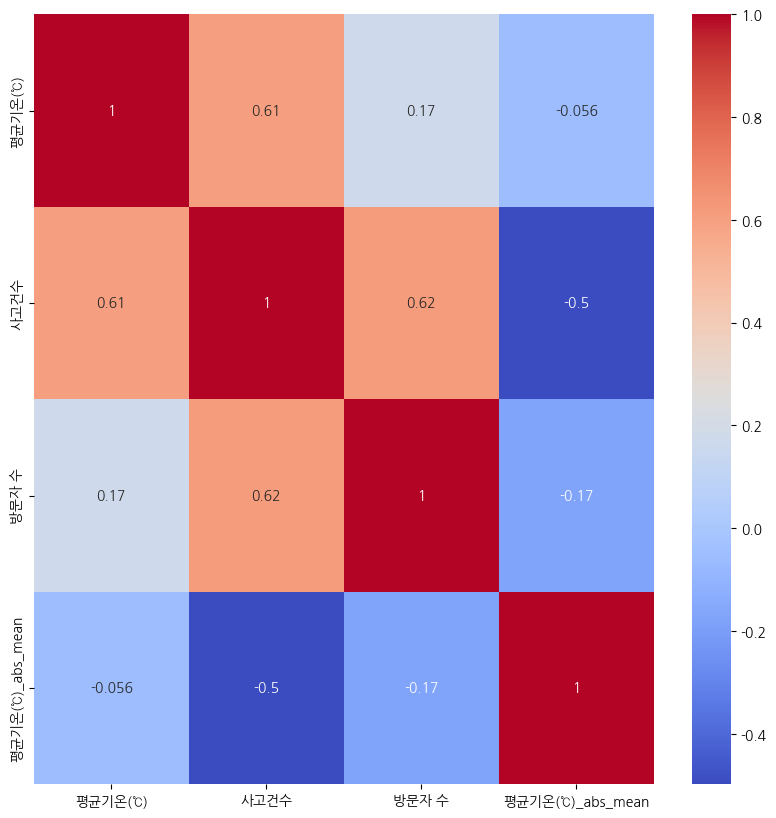

In [89]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# 사고건수와 방문자수는 관계가 많다 여행은 교통사고에 영향을 준다

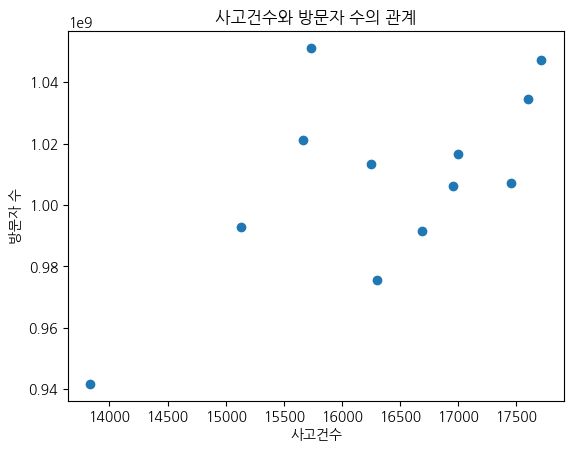

In [42]:
plt.scatter(rf['사고건수'],rf['방문자 수'])
plt.title('사고건수와 방문자 수의 관계')
plt.xlabel('사고건수')
plt.ylabel('방문자 수')
plt.show()

In [43]:
rf.corr()

,사고건수,방문자 수
사고건수,1.000000,0.615242
방문자 수,0.615242,1.000000


In [44]:
city_list = list(df['도시명'].unique())
print(city_list)


['서울 종로구', '서울 중구', '서울 용산구', '서울 성동구', '서울 동대문구', '서울 성북구', '서울 도봉구', '서울 은평구', '서울 서대문구', '서울 마포구', '서울 강서구', '서울 구로구', '서울 영등포구', '서울 동작구', '서울 관악구', '서울 강남구', '서울 강동구', '서울 송파구', '서울 서초구', '서울 양천구', '서울 중랑구', '서울 노원구', '서울 광진구', '서울 강북구', '서울 금천구', '부산 중구', '부산 서구', '부산 동구', '부산 영도구', '부산 부산진구', '부산 동래구', '부산 남구', '부산 북구', '부산 해운대구', '부산 사하구', '부산 금정구', '부산 강서구', '부산 연제구', '부산 수영구', '부산 사상구', '부산 기장군', '경기 수원시', '경기 성남시', '경기 의정부시', '경기 안양시', '경기 부천시', '경기 안산시', '경기 평택시', '경기 광명시', '경기 구리시', '경기 양주시', '경기 여주시', '경기 화성시', '경기 시흥시', '경기 파주시', '경기 고양시', '경기 광주시', '경기 연천군', '경기 포천시', '경기 가평군', '경기 양평군', '경기 이천시', '경기 용인시', '경기 안성시', '경기 김포시', '경기 동두천시', '경기 과천시', '경기 군포시', '경기 남양주시', '경기 오산시', '경기 의왕시', '경기 하남시', '강원 춘천시', '강원 원주시', '강원 동해시', '강원 강릉시', '강원 속초시', '강원 태백시', '강원 삼척시', '강원 홍천군', '강원 횡성군', '강원 영월군', '강원 평창군', '강원 정선군', '강원 철원군', '강원 화천군', '강원 양구군', '강원 인제군', '강원 고성군', '강원 양양군', '충북 청주시', '충북 충주시', '충북 제천시', '충북 보은군', '충북 옥천군', '충북 영동군', '충북 진천군', '충북 괴산군', '충북 음성군', '충북 단양군

In [45]:
import pandas as pd
import geopy
from geopy.geocoders import Nominatim

try:
    city=pd.read_csv('city.csv')
except:
    def get_coordinates(주소):
        geolocator = Nominatim(user_agent="aaa")
        location = geolocator.geocode(주소)
        try:
            result= location.latitude, location.longitude
        except:
            result= None, None
        print(result)
        return result

    city=pd.DataFrame(city_list, columns=['도시명'])
    city['위도'], city['경도'] = zip(*city['도시명'].map(get_coordinates))
city

,도시명,위도,경도
0,서울 종로구,37.580695,126.982799
1,서울 중구,37.563656,126.997510
2,서울 용산구,37.553436,126.969799
3,서울 성동구,37.563500,127.036500
4,서울 동대문구,37.574198,127.039509
...,...,...,...
223,울산 남구,35.498487,129.345936
224,울산 동구,35.504666,129.417011
225,울산 북구,35.582600,129.360400
226,울산 울주군,35.551314,129.137930


In [46]:
city.to_csv('city.csv', index=False)

In [47]:
df=pd.merge(df, city, on='도시명', how='left')[['도시명','위도','경도','사고건수','발생월']]
df

,도시명,위도,경도,사고건수,발생월
0,서울 종로구,37.580695,126.982799,77,1
1,서울 종로구,37.580695,126.982799,56,2
2,서울 종로구,37.580695,126.982799,74,3
3,서울 종로구,37.580695,126.982799,84,4
4,서울 종로구,37.580695,126.982799,61,5
...,...,...,...,...,...
2735,세종 세종시,36.588360,127.295139,108,8
2736,세종 세종시,36.588360,127.295139,103,9
2737,세종 세종시,36.588360,127.295139,104,10
2738,세종 세종시,36.588360,127.295139,136,11


In [48]:
df.dropna(inplace=True)
df

,도시명,위도,경도,사고건수,발생월
0,서울 종로구,37.580695,126.982799,77,1
1,서울 종로구,37.580695,126.982799,56,2
2,서울 종로구,37.580695,126.982799,74,3
3,서울 종로구,37.580695,126.982799,84,4
4,서울 종로구,37.580695,126.982799,61,5
...,...,...,...,...,...
2735,세종 세종시,36.588360,127.295139,108,8
2736,세종 세종시,36.588360,127.295139,103,9
2737,세종 세종시,36.588360,127.295139,104,10
2738,세종 세종시,36.588360,127.295139,136,11


In [49]:
df.to_csv('result.csv', index=False)


In [50]:
import folium

# 위도와 경도의 최소값, 최대값을 찾아서 지도의 범위를 설정
min_lat = float(df['위도'].min())
max_lat = float(df['위도'].max())
min_lon = float(df['경도'].min())
max_lon = float(df['경도'].max())

# 지도 생성
m = folium.Map(location=[(min_lat + max_lat) / 2, (min_lon + max_lon) / 2], zoom_start=12)

# 위도와 경도를 이용해 지도에 마커 생성
for i in range(len(df)):
    lat = float(df.iloc[i]['위도'])
    lon = float(df.iloc[i]['경도'])
    count = int(df.iloc[i]['사고건수'])
    folium.Circle(
        [lat, lon],
        radius=20 * count,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

# 지도 표시
m


In [51]:
m.save('map.html')

,년월,지점,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
0,2024-01,전국,0.9,-3.4,5.7
1,2024-02,전국,4.1,0.0,8.8
2,2024-03,전국,6.9,1.4,12.6
3,2024-04,전국,14.9,9.4,21.1
4,2024-05,전국,17.7,11.8,24.0
5,2024-06,전국,22.7,17.5,28.4
6,2024-07,전국,26.2,23.3,29.9
7,2024-08,전국,27.9,24.1,33.0
8,2024-09,전국,24.7,20.9,29.6
9,2024-10,전국,16.1,11.9,21.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   년월         12 non-null     object 
 1   지점         12 non-null     object 
 2   평균기온(℃)    12 non-null     float64
 3   평균최저기온(℃)  12 non-null     float64
 4   평균최고기온(℃)  12 non-null     float64
dtypes: float64(3), object(2)
memory usage: 612.0+ bytes
